In [1]:
#import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
# Read the data
df = pd.read_csv('data_regression.csv')
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [4]:
#  drop unnecessary columns
df.drop(columns=['customer_id','phone_no'],inplace = True)

In [5]:
## check the missing value
df.isnull().sum()

year                       0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [6]:
# divide the columns into categorical and numerical columns
df_num = df.select_dtypes(exclude='object').columns
df_cat = df.select_dtypes(include = 'object').columns

In [7]:
# analyse the missing value of categorical columns
df[df_cat].isnull().sum()

gender             24
multi_screen        0
mail_subscribed     0
dtype: int64

In [8]:
# missing the gender columns with mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [9]:
# analyse the missing value of numerical columns
df[df_num].isnull().sum()

year                       0
age                        0
no_of_days_subscribed      0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [10]:
# we find the maximum_daily_mins and churn columns are values missing so we can fill the median
df['churn'] = df['churn'].fillna(df['churn'].mode()[0])
df['maximum_days_inactive'] = df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].median())

In [11]:
# convert the churn data type from float to int
df['churn']=df['churn'].astype(int)

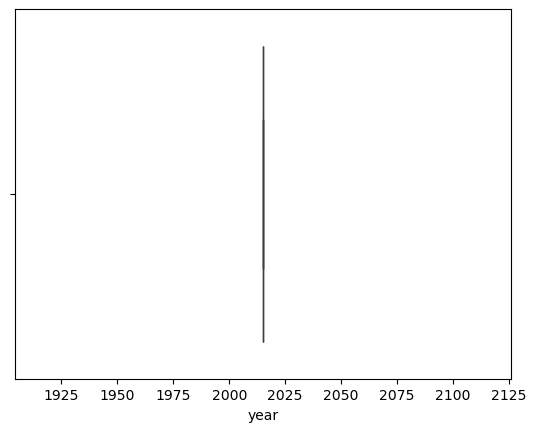

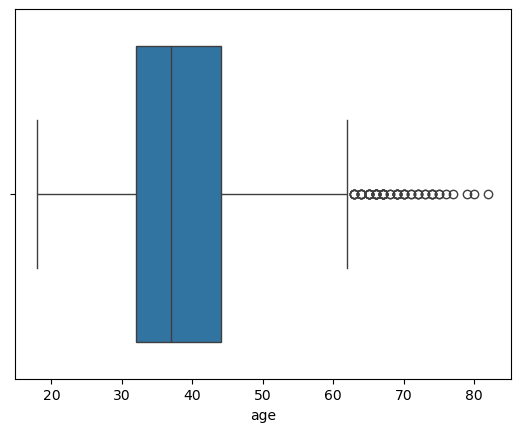

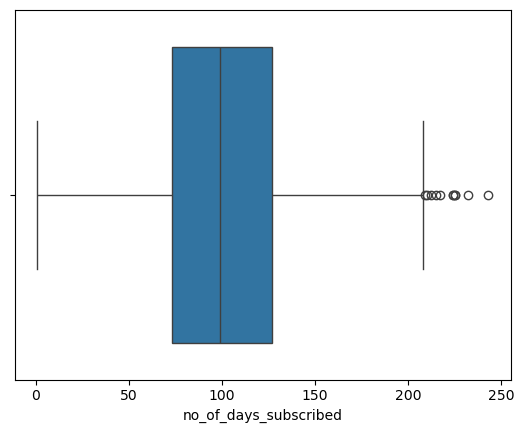

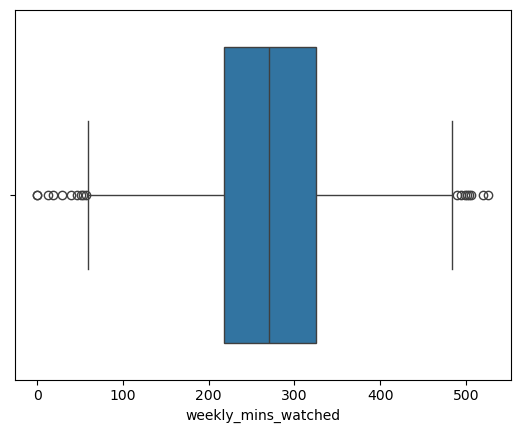

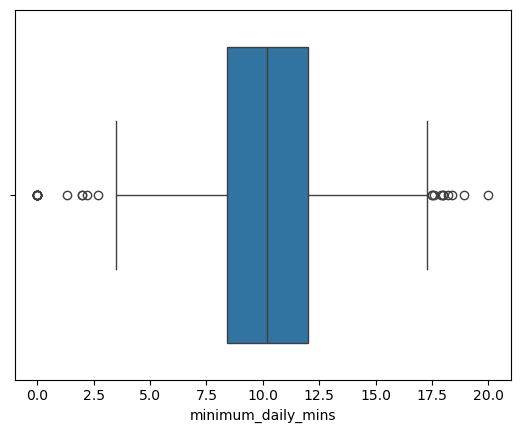

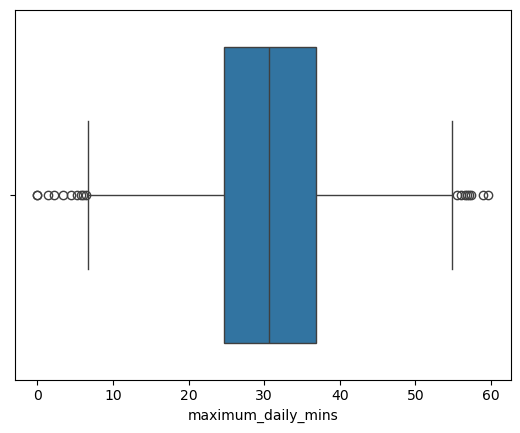

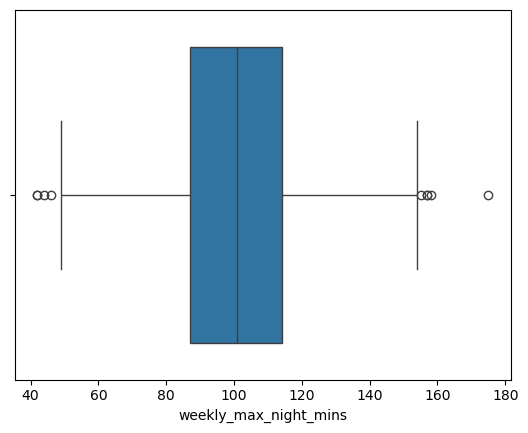

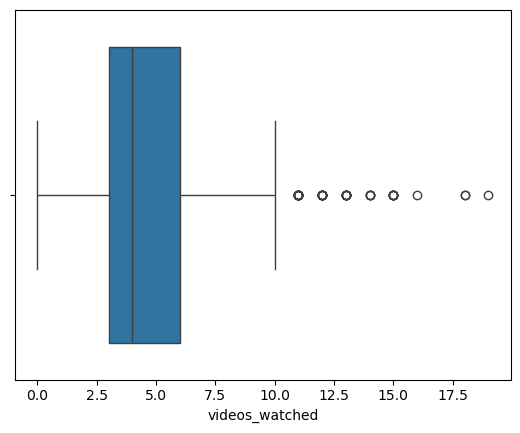

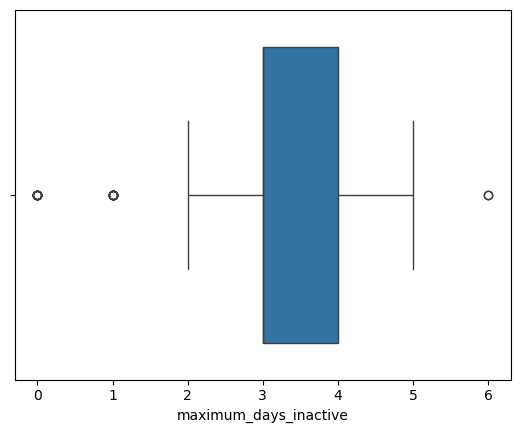

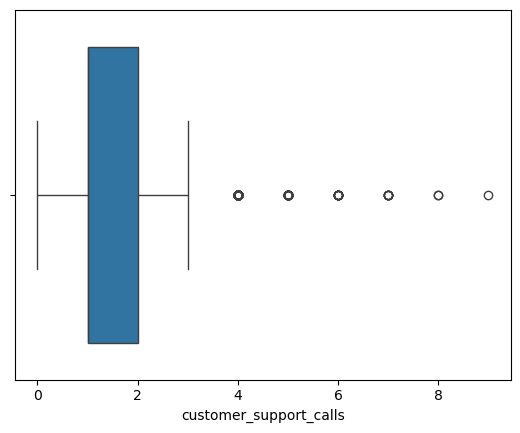

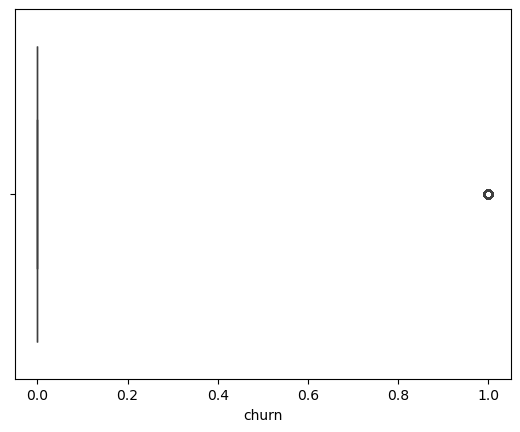

In [12]:
# check the outliers in any columns
for i in df_num:
    sns.boxplot(df[i], orient='h')
    plt.show()

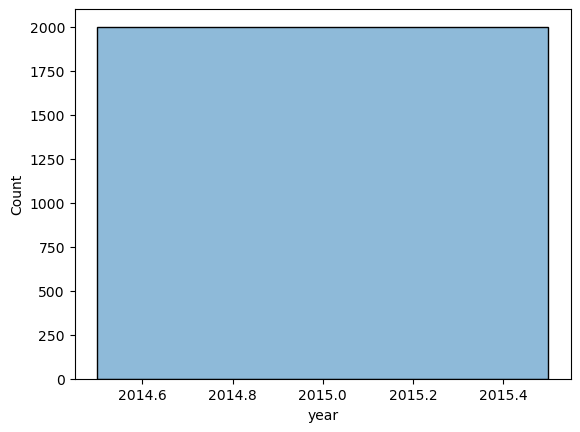

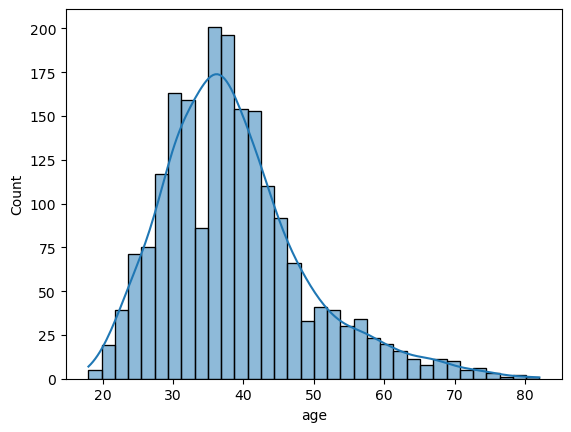

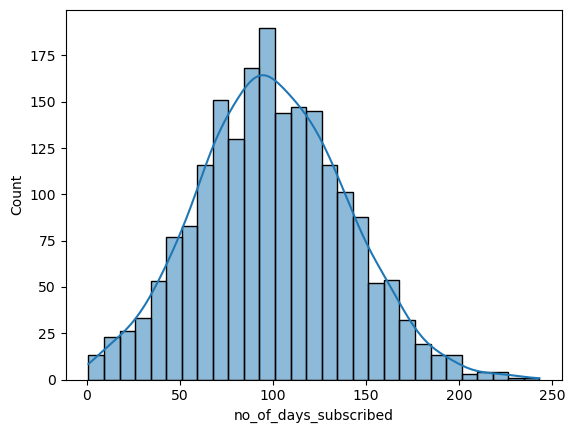

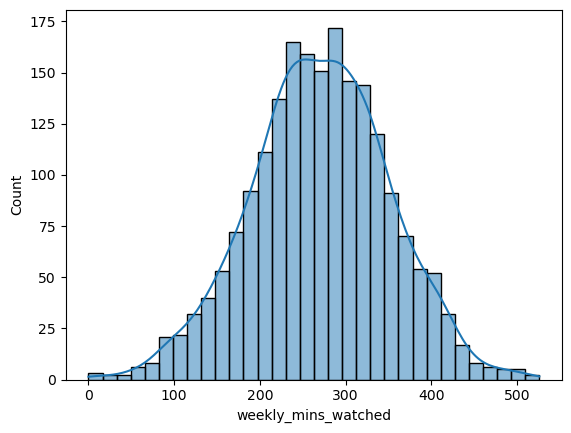

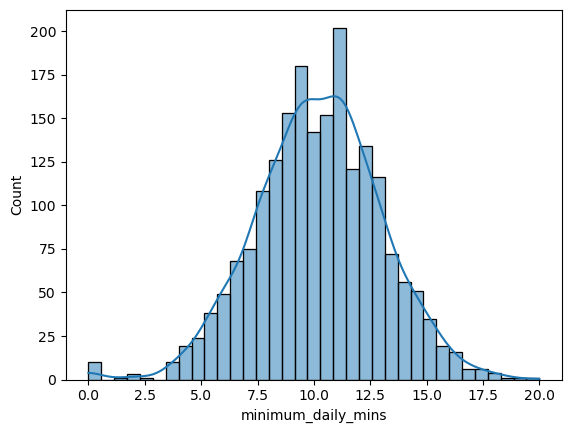

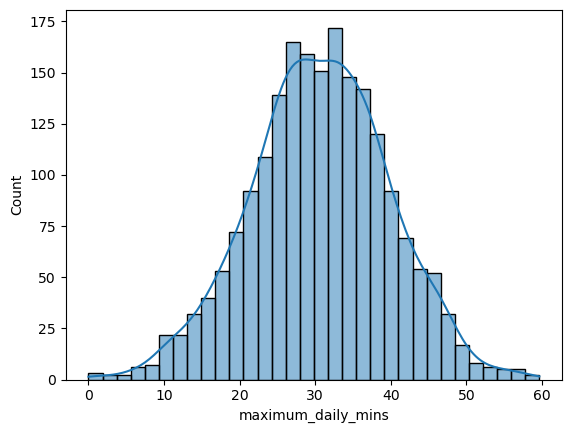

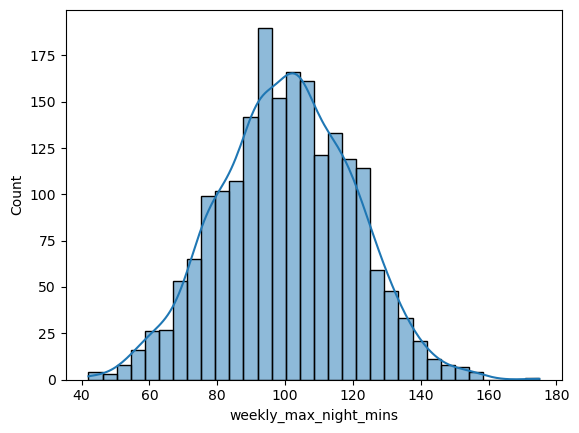

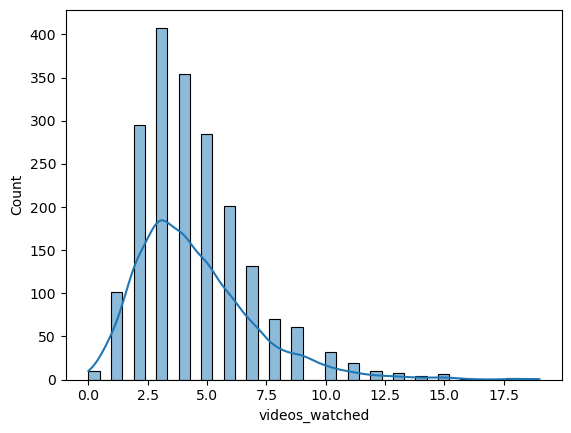

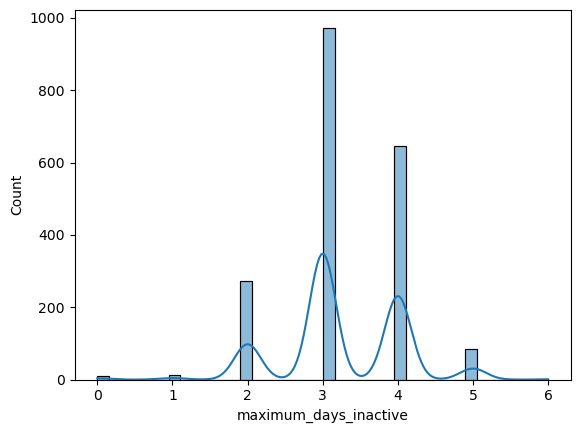

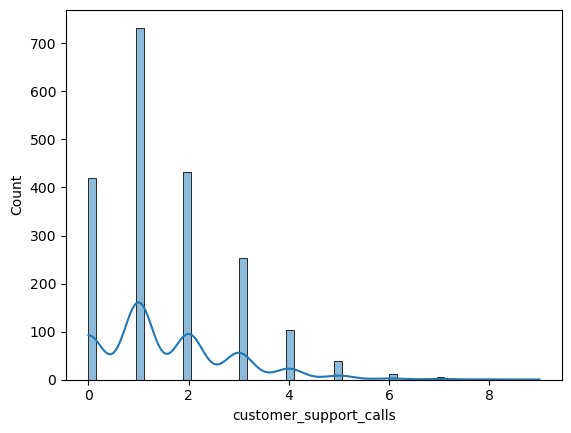

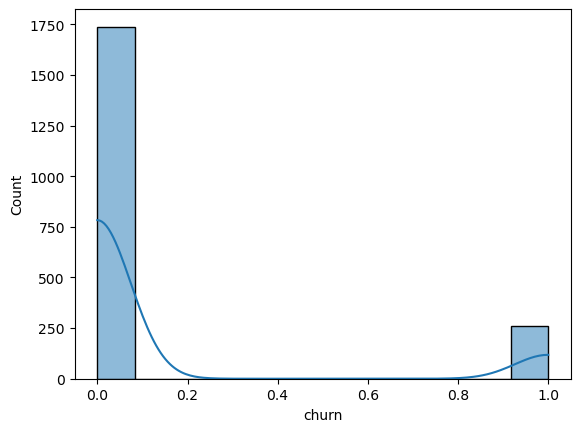

In [13]:
# plot histrogram of numerical columns
for i in df_num:
    sns.histplot(df[i], kde = True)
    plt.show()

In [14]:
# convert the categorical columns to numerical columns using label encoding
for i in df_cat:
    print(f" {i} : {df[i].unique()}")


 gender : ['Female' 'Male']
 multi_screen : ['no' 'yes']
 mail_subscribed : ['no' 'yes']


In [15]:
for i in df_cat:
    label_encoder = LabelEncoder()

    label_encoder.fit(df[i].unique())

    df[i] = label_encoder.transform(df[i])

    print(f"{i}: {df[i].unique()}")

gender: [0 1]
multi_screen: [0 1]
mail_subscribed: [0 1]


<Axes: >

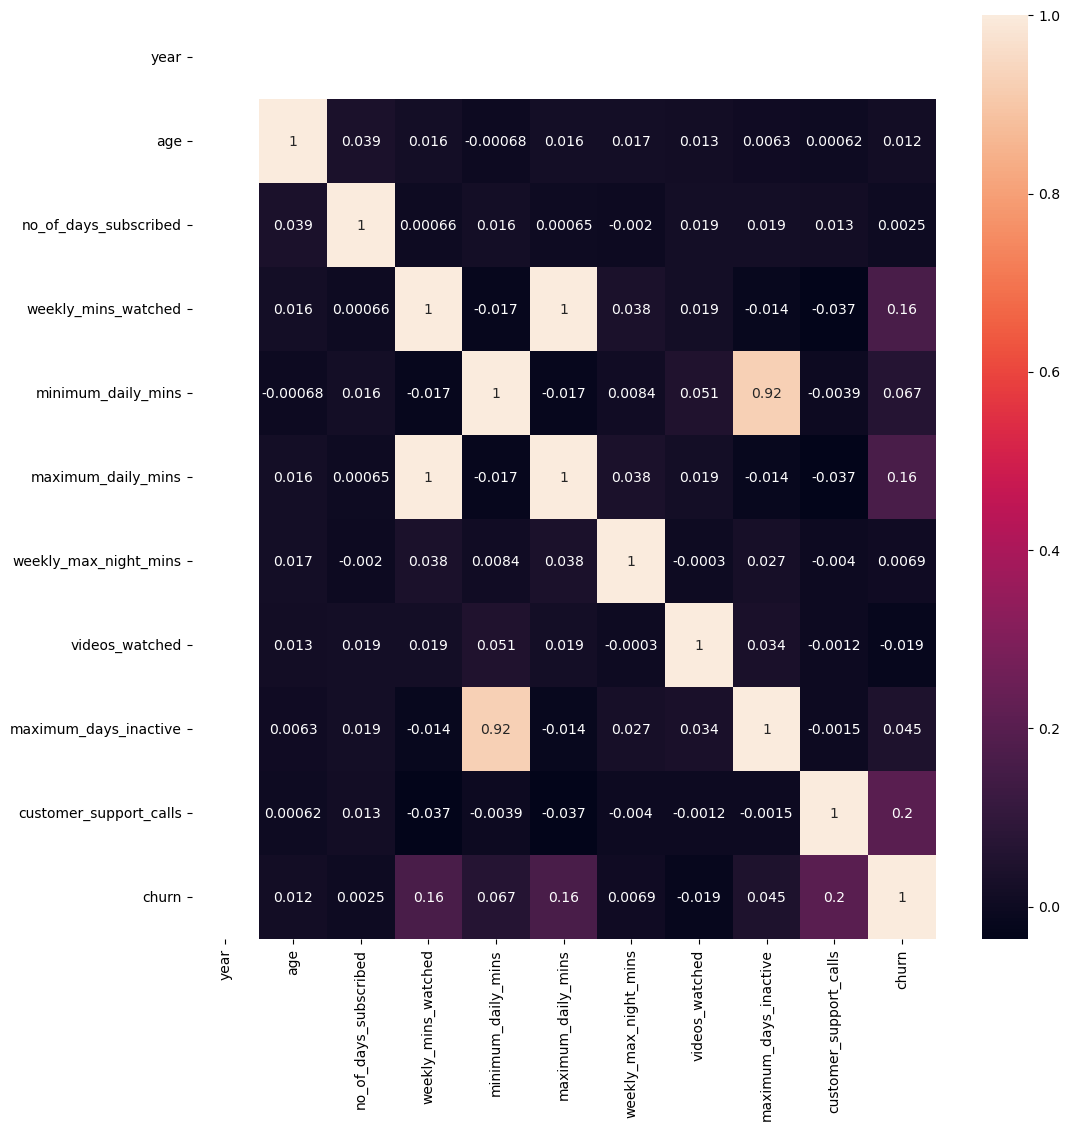

In [16]:
# check the correlation between the columns
plt.figure(figsize=(12,12))
sns.heatmap(df[df_num].corr(),annot=True)

In [17]:
# some columns are correlated to each other
# we use the concept of variance threshold to remove this columns

vt = VarianceThreshold()
vt.fit(df)

VarianceThreshold()

In [18]:
vt.get_params()

{'threshold': 0.0}

In [19]:
vt.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [20]:
# we drop the year columns because variance threshold is zero
df.drop('year', axis = 1, inplace=True)

In [21]:
# divide the data into input and output
X = df.drop('churn', axis = 1)
y = df['churn']

In [22]:
# divide the train in X_train, X_test, test in y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.20)

In [23]:
# shape of train and test 
print("X_train:",X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test", y_test.shape)

X_train: (1600, 12)
X_test: (400, 12)
y_train: (1600,)
y_test (400,)


## without parameter

**Decision Tree**

In [24]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_dt = DT.predict(X_test)

***metrices of DecisionTree***

In [25]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_dt, y_test)
precision = precision_score(y_pred_dt, y_test)
recall = recall_score(y_pred_dt, y_test)
accuracy = accuracy_score(y_pred_dt, y_test)

In [26]:
print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)

f1 score: 50.0
precision 51.06382978723404
recall 48.97959183673469
accuracy 88.0


**Logistic Regression**

In [27]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_lr = LR.predict(X_test)

***Metrices of LogisticRegression***

In [28]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_lr, y_test)
precision = precision_score(y_pred_lr, y_test)
recall = recall_score(y_pred_lr, y_test)
accuracy = accuracy_score(y_pred_lr, y_test)

print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)


f1 score: 18.75
precision 12.76595744680851
recall 35.294117647058826
accuracy 87.0


**KNN**

In [29]:
# knn model
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

***Metrices of KNN***

In [30]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_knn, y_test)
precision = precision_score(y_pred_knn, y_test)
recall = recall_score(y_pred_knn, y_test)
accuracy = accuracy_score(y_pred_knn, y_test)

print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)


f1 score: 16.43835616438356
precision 12.76595744680851
recall 23.076923076923077
accuracy 84.75


**Random Forest**

In [31]:
# random forest model
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

**Metrices of Random Forest**

In [32]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_knn, y_test)
precision = precision_score(y_pred_knn, y_test)
recall = recall_score(y_pred_knn, y_test)
accuracy = accuracy_score(y_pred_knn, y_test)

print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)


f1 score: 16.43835616438356
precision 12.76595744680851
recall 23.076923076923077
accuracy 84.75


## Using hyperparameter tuning

**decision tree**

In [33]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [34]:
# define the param grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# create the decision tree classifier
dtree = DecisionTreeClassifier()

# instantiate the grid search with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv = 5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best paramters
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [35]:
# rebuild the model
DT = DecisionTreeClassifier(
 criterion = 'gini',
 max_depth = 10,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 4,
 min_samples_split = 10
)

In [36]:
# fit the model
DT.fit(X, y)
y_pred_dt_h = DT.predict(X_test)

***Metrices of DecisionTreeClassifier***

In [37]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_dt_h, y_test)
precision = precision_score(y_pred_dt_h, y_test)
recall = recall_score(y_pred_dt_h, y_test)
accuracy = accuracy_score(y_pred_dt_h, y_test)

print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)

f1 score: 69.23076923076923
precision 57.446808510638306
recall 87.09677419354838
accuracy 94.0


**Logistic Regression**

In [38]:
# get the params
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
param_grid = {
    'penalty': ['l1','l2','elsticnet', 'none'],
    'random_state': [0,42],
    'multi_class': ['auto','ovr','multinomial']
}
# create the logisitics regression
LogRegress = LogisticRegression()

# instantiate the grid search with cross-validation
grid_search = GridSearchCV(LogRegress, param_grid, cv = 5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best paramters
best_params = grid_search.best_params_
best_params

{'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0}

In [40]:
# pass the hyperparamter to the model
LR = LogisticRegression(
    multi_class = 'auto',
    penalty = 'l2',
    random_state = 0
)

In [41]:
# fit the model
LR.fit(X_train,y_train)
y_pred_lr_h = LR.predict(X_test)

***Metrices of logistics Regression***

In [42]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_lr_h, y_test)
precision = precision_score(y_pred_lr_h, y_test)
recall = recall_score(y_pred_lr_h, y_test)
accuracy = accuracy_score(y_pred_lr_h, y_test)

print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)

f1 score: 18.75
precision 12.76595744680851
recall 35.294117647058826
accuracy 87.0


**KNN**

In [43]:
# KNN paramters
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
param_grid = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree','kd_tree','brute'],
    'n_neighbors': [1,2,3,4,5],
    'p' : [1,2]
}
# create the KNN model
KNN_h = KNeighborsClassifier()

# instantiate the grid search with cross-validation
grid_search = GridSearchCV(KNN_h, param_grid, cv = 5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best paramters
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}

In [45]:
# build the model with hyper paramters
KNN = KNeighborsClassifier(
    algorithm = 'auto',
    n_neighbors = 2,
    p = 2,
    weights = 'uniform'
)

KNN.fit(X_train,y_train)
y_pred_knn_h = KNN.predict(X_test)

***metrices of KNN***

In [46]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_knn_h, y_test)
precision = precision_score(y_pred_knn_h, y_test)
recall = recall_score(y_pred_knn_h, y_test)
accuracy = accuracy_score(y_pred_knn_h, y_test)

print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)

f1 score: 7.017543859649122
precision 4.25531914893617
recall 20.0
accuracy 86.75


**Random Forest**

In [47]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': ['auto','sqrt','log2'],
    'random_state': [0,42]
}
# create the random_forest model
RF = RandomForestClassifier()

# instantiate the grid search with cross-validation
grid_search = GridSearchCV(RF, param_grid, cv = 5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best paramters
best_params = grid_search.best_params_
best_params


{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'random_state': 0}

In [49]:
# pass the model with paramters
RF = RandomForestClassifier(
    criterion = 'entropy',
    min_samples_leaf = 1,
    min_samples_split = 3,
    random_state = 42
)

RF.fit(X_train,y_train)
y_pred_RF_h = RF.predict(X_test)
y_pred_RF_h

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

***Metrices of Random Forest***

In [50]:
# find the accuracy, f1_score, precision, Recall
f1 = f1_score(y_pred_RF_h, y_test)
precision = precision_score(y_pred_RF_h, y_test)
recall = recall_score(y_pred_RF_h, y_test)
accuracy = accuracy_score(y_pred_RF_h, y_test)

print("f1 score:", f1*100)
print("precision", precision*100)
print("recall", recall*100)
print("accuracy", accuracy*100)

f1 score: 55.81395348837209
precision 51.06382978723404
recall 61.53846153846154
accuracy 90.5


In [51]:
## random forest is the best mode whose accuracy is very high

# dump the trained mode to a file using joblib
joblib.dump(RF, 'churn_model.joblib')

['churn_model.joblib']

In [52]:
## load the model
loaded_model = joblib.load('churn_model.joblib')

In [53]:
loaded_model

RandomForestClassifier(criterion='entropy', min_samples_split=3,
                       random_state=42)

In [54]:
X_train.columns

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls'],
      dtype='object')

In [55]:
sklearn.__version__

'1.4.2'

In [56]:
X_test

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
1860,0,33,23,0,0,169.65,6.9,19.23,126,2,3.0,1
353,1,27,50,0,1,321.45,10.6,36.43,130,4,3.0,1
1333,0,45,108,0,0,281.10,12.6,31.86,107,8,4.0,1
905,0,43,155,0,0,325.05,10.8,36.84,106,1,3.0,2
1289,1,41,146,0,1,231.00,8.2,26.18,107,4,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
965,0,28,135,1,1,191.55,5.8,21.71,84,4,2.0,2
1284,1,33,67,0,0,302.10,7.0,34.24,119,3,2.0,0
1739,1,41,58,0,1,291.75,9.5,33.07,92,2,3.0,1
261,0,35,87,0,0,307.20,9.5,34.82,89,3,3.0,0


In [57]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Users\panka\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.
